# **CatBoost Works with Category Not Object**
# **In CatBoost We Don`t Need to use Encoder in Numeric Columns**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from catboost import CatBoostClassifier,CatBoostRegressor,Pool
import warnings
warnings.filterwarnings('ignore')


In [44]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
numeric_cols=['age', 'sibsp', 'parch', 'fare']

categorical_cols = ['sex', 'embarked', 'class','who', 'adult_male', 'embark_town','alone']

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
df.drop('deck', axis=1, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# **CatBoost Works with Category Not Object**

In [46]:
#Changing object to category using loop
categoric_Cols=df.select_dtypes(include=['object']).columns
df[categoric_Cols]=df[categoric_Cols].astype('category')

In [47]:
X=df.drop(['survived','alive'],axis=1)
y=df['survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=False
)
cat_features = np.where(X_train.dtypes == 'category')[0]

model.fit(X_train, y_train, cat_features=cat_features)

y_pred=model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred,average='macro'))
print('Recall:',recall_score(y_test,y_pred,average='macro'))
print('F1:',f1_score(y_test,y_pred,average='macro'))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))


Accuracy: 0.8212290502793296
Precision: 0.8205953338696701
Recall: 0.8077220077220078
F1: 0.8123197903014416
Confusion Matrix: [[93 12]
 [20 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



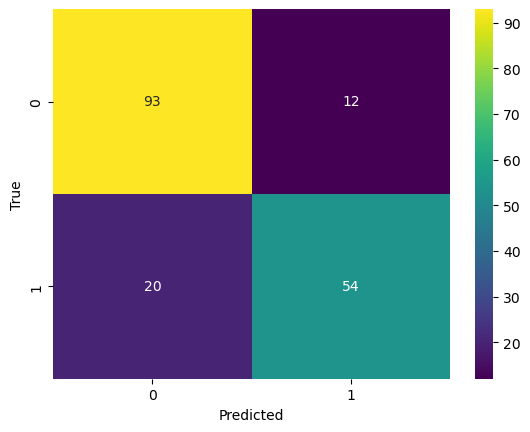

In [48]:
#Making Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

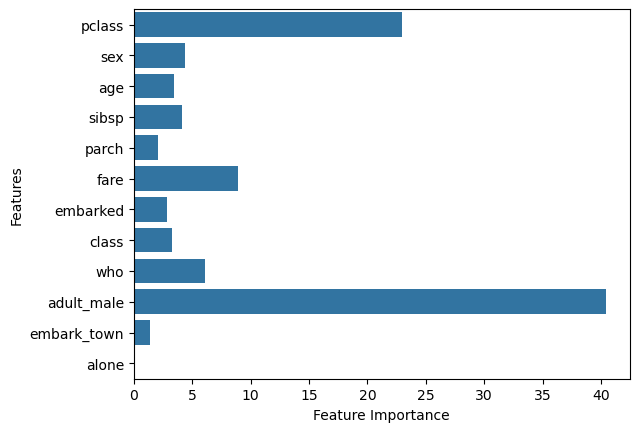

In [49]:
#Showing Feature importance using bar chart
importance=model.feature_importances_
sns.barplot(x=importance,y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()